#Import necessary Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Import the data

In [5]:
df= pd.read_csv('data/StudentsPerformance.csv')

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

In [17]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Data Checks to perform-
Check Missing values,
Check Duplicates,
Check Data type,
Check number of unique values in each column,
Check statistics of the data.

In [ ]:
df.isna().sum()

#there is no missing values in the dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.duplicated().sum()

#There is no duplicate values in the dataset

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [23]:
#Define categorical and numerical columns

numerical_cols = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_cols = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"numerical_cols-\n{numerical_cols}\n\ncategorical_cols\n{categorical_cols}")

numerical_cols-
['math score', 'reading score', 'writing score']

categorical_cols
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#Feature Engineering

In [25]:
df['total_score'] = df["math score"] + df["reading score"] + df["writing score"]
df['Average'] = df['total_score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
reading_full = df[df['reading score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()
math_full = df[df['math score'] == 100]['Average'].count()

print(f'Number of students with full marks in Math:{math_full}')
print(f'Number of students with full marks in writing:{writing_full}')
print(f'Number of students with full marks in reading:{reading_full}')

Number of students with full marks in Math:7
Number of students with full marks in writing:14
Number of students with full marks in reading:17


#Visualization

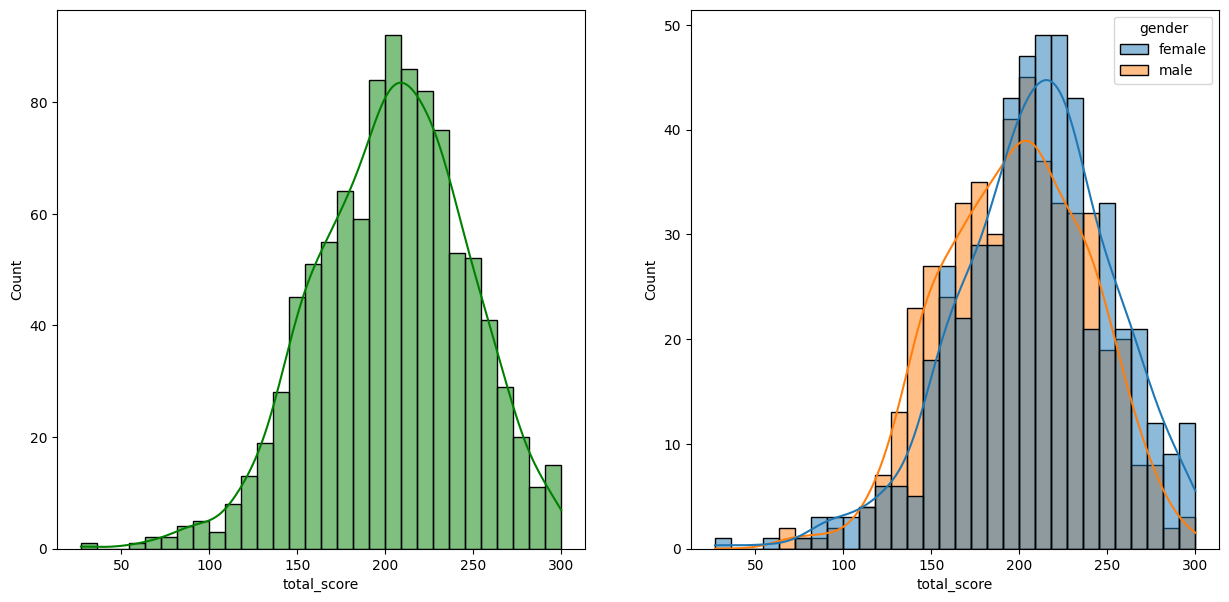

In [39]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x= 'total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x= 'total_score', bins=30, kde=True, color='g', hue='gender')
plt.show()

#insight - Female students tend to perform well than male students

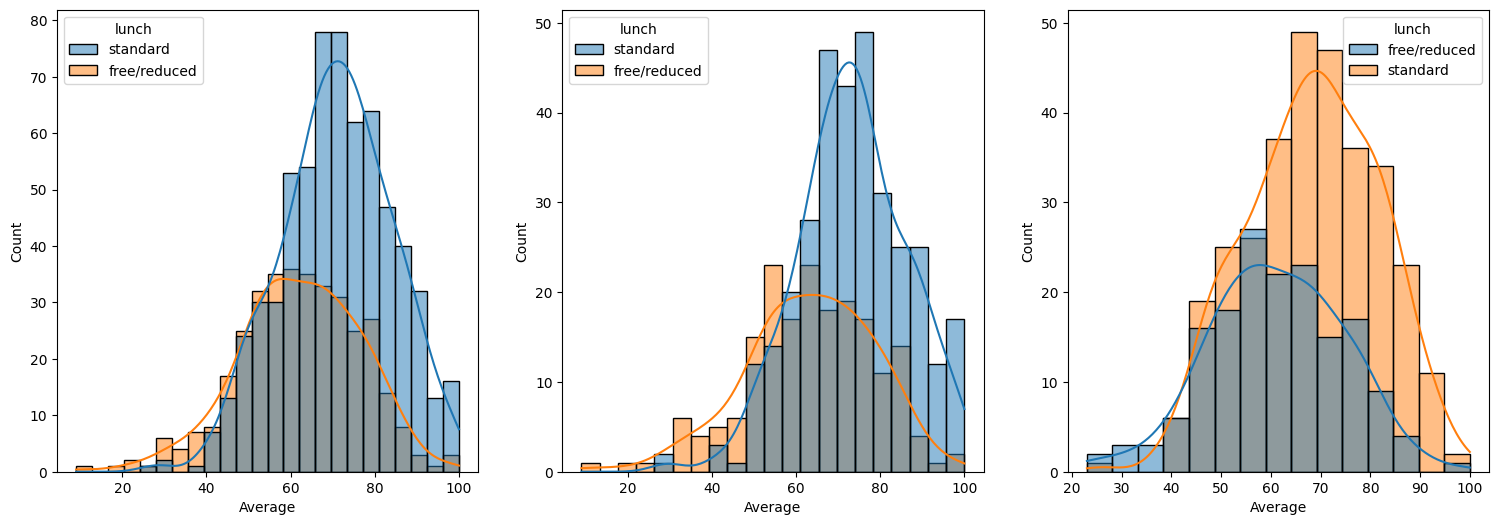

In [42]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True, hue='lunch') 
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True, hue='lunch') 
plt.show()